# Functions

## Definition

In [1]:
def my_function(arg1, arg2):
    '''Here I can say what my function does.
    I can use several lines
    arg1: It is a good idea to define the arguments as well
    arg2: Another one'''
    
    print(f'I am going to add {arg1} and {arg2} together')
    total = arg1 + arg2
    return total

In [2]:
add=my_function(1,2)
print(add)

I am going to add 1 and 2 together
3


## Type of arguments

You can specify arguments in different ways. You can have required and optional arguments, you can give arguments by position (like above) or by name.

In [ ]:
# Give arguments per name (keyword argument)
add=my_function(arg2=1, arg1=2)
print(add)

# This is illegal. Positional arguments need to be first listed.
#add=my_function(arg2=1,2)
# If mixing positional and keyword arguments, positional arguments are attributed in order so the following
# does not work
#add=my_function(2,arg1=1)

In [14]:
# Optional arguments:
def my_function(arg1, opt=None):
    if opt is not None:
        return(arg1*opt)
    else:
        return(arg1)

print(my_function(1))
print(my_function(1,4))

1
4


What is going on with the following?

<div class="accordion" id="accordion">
  <div class="card">
    <div class="card-header" id="headingOne">
      <h5 class="mb-0">
        <button class="btn btn-link" type="button" data-toggle="collapse" data-target="#falsepy" aria-expanded="true" aria-controls="falsepy">
          Answer
        </button>
      </h5>
    </div>
  <div>
    <div id="falsepy" class="collapse" aria-labelledby="headingOne" data-parent="#accordion">
      <div class="card-body">
          What happens is that for Python, 0 is False. So `if 0:` is False and the `else:` section is executed. Remember that Python consider None, 0 and False as False.
      </div>
    </div>
  </div>
</div>

In [2]:
def my_function(arg1, opt=None):
    if opt:
        return(arg1*opt)
    else:
        return(arg1)
    
print(my_function(1,0))

1


In [ ]:
# Optional arguments can also be used to define default values instead of nothing:
def add_5_or(arg1, opt=5):
    return(arg1+opt)

print(add_5_or(1))
print(add_5_or(1,6))

In [ ]:
# Use lists/tuples or dictionaries to specify arguments
t=(1,4)
print(add_5_or(*t))

dic={'arg1':1, 'opt':4}
print(add_5_or(**dic))

If you remember, we saw the `**` operator last week with the `str.format()` method. It's exactly the same as here. 

Specifying arguments via a dictionary can be useful for specifying options for plot routines. When tailoring plots, one usually ends up using a lot of options. Defining a dictionary for those can allow for a more readable code and for easier reuse of the options between plots.

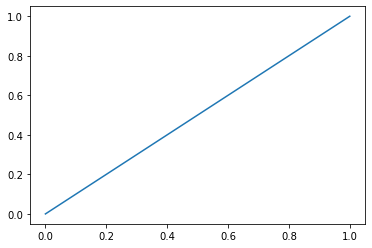

In [3]:
# An example for plots:
import matplotlib.pyplot as plt
plt.plot([0,1],[0,1])

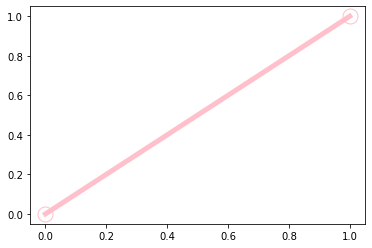

In [7]:
plot_opt={"linewidth":5,
          "color":"pink",
          "marker":"o",
          "markersize":15,
          "fillstyle":"none"}
plt.plot([0,1],[0,1],**plot_opt)

## Global vs local scope
Variables defined in function are local, unknown from the outside of the function. On the other hand, variables defined outside a function are known to the functions as they are in a scope comprising the function.

Run the following code. Do you understand what is going on?

<div class="accordion" id="accordion">
  <div class="card">
    <div class="card-header" id="headingOne">
      <h5 class="mb-0">
        <button class="btn btn-link" type="button" data-toggle="collapse" data-target="#expl2" aria-expanded="true" aria-controls="expl2">
          Answer
        </button>
      </h5>
    </div>
  <div>
    <div id="expl2" class="collapse" aria-labelledby="headingOne" data-parent="#accordion">
      <div class="card-body">
          <p>The function defines a local object called total. This object only exists within the function. It is independent from the object define outside the function. `total` defined outside the function is in global scope. This means it can be used throughout the body program including the functions body. </p>
          <p>If you define a local variable with the same name as a global variable in a function, you can not use the global variable in that function.</p>
      </div>
    </div>
  </div>
</div>

In [15]:
total=0
def summing(arg1, arg2):
    total = arg1+arg2
    return total

add = summing(1,2)
print("After the function:", total)

total=2
def sum2(arg1, arg2):
    tt = arg1+arg2+total
    return tt
add = sum2(3,4)
print("Final add:",add)

After the function: 0
Final add: 9


## Pass by Reference vs Value
Python passes arguments per reference. That means they still point to the same location in memory outside and within a function.

Do you understand what is going on in the following example?

<div class="accordion" id="accordion">
  <div class="card">
    <div class="card-header" id="headingOne">
      <h5 class="mb-0">
        <button class="btn btn-link" type="button" data-toggle="collapse" data-target="#expl3" aria-expanded="true" aria-controls="expl3">
          Explanation
        </button>
      </h5>
    </div>
  <div>
    <div id="expl3" class="collapse" aria-labelledby="headingOne" data-parent="#accordion">
      <div class="card-body">
          <p>In changeme(), since li is a global object, it's values get modified despite the function not returning anything. </p>
          <p>In changeme2(), li becomes a local variable. The function completely forgets about the argument.</p>
          <p>Note the behaviour would be the same without passing li as an argument since li is a global object.</p>
          <p>What would happen if li was a tuple instead of a list?</p>
      </div>
    </div>
  </div>
</div>

In [16]:
def changeme(li):
    li[0] = 3
    return

def changeme2(li):
    li = [5,4]
    return

li=[1,2]
print(f"List at the start: {li}")

changeme(li)
print(f"List after changeme: {li}")

changeme2(li)
print(f"List after changeme2: {li}")

List at the start: [1, 2]
List after changeme: [3, 2]
List after changeme2: [3, 2]


In [21]:
def local_copy(li):
    loc=li
    loc[0]=3
    return loc

li=[1,2]
print(local_copy(li), li)

[3, 2] [3, 2]


---

# Read in files, Write to files

### Open and close files

To open a text file, there is the `open()` function. It accepts 2 arguments: name of the file and the opening mode for the file.

| Modes | Meaning |
|:------:|--------|
| r   | read-only mode |
| w   | write-only mode |
| a   | append to existing file |
| r+  | read and write mode |

For binary files, you need to append `b` to the mode so Python knows to read or write byte objects.
To read in data, there are 3 methods: `read()`, `readline()`, `readlines()`. The only difference is the amount of data they read from the file. `read()` will only read the given number of charaters (or whole file), `readline()` reads the file line by line, `readlines()` reads in the entire file or a maximum number of bytes/characters.
Also, Python handily manages the conversion of end of line markers (`\n` on Unix, `\r\n` on Windows) so you don't have to worry about it.

To close a file, use the `close()` method.

### Read from file

In [5]:
# f.seek(0) allows to rewind the file to the start of the file after each read.
# Check what each output looks like. What is the difference between `f.read()` and `f.readlines()`?
f = open('test.txt','r')
whole_file = f.read()
f.seek(0)
first_line = f.readline()
f.seek(0)
whole2 = f.readlines()
f.close()

In [6]:
print(whole_file, first_line, whole2)

This is an example text file.
Let's see what happens with csv-type files
50, 30, 40
70, 20, 30
 This is an example text file.
 ['This is an example text file.\n', "Let's see what happens with csv-type files\n", '50, 30, 40\n', '70, 20, 30\n']


In [7]:
whole_file

"This is an example text file.\nLet's see what happens with csv-type files\n50, 30, 40\n70, 20, 30\n"

### Write to file

Writing to a file is pretty symetrical to reading it in:

In [8]:
f = open('my_file.txt','w')
f.write('Hello!')
lines=['Other line', 'One more']
f.writelines(lines)
f.close()

To check what's in the file, we use the iPython magic commands to call the `cat` bash command:

In [9]:
!cat my_file.txt

Hello!Other lineOne more

Hmm, something went wrong. Python needs you to specify those are separate lines by adding a newline symbol: `\n`

In [10]:
f = open('my_file.txt','w')
f.write('Hello!\n')
lines=['Other line\n', 'One more\n']
f.writelines(lines)
f.close()

In [11]:
!cat my_file.txt

Hello!
Other line
One more


### With statement

It is also possible to use the `with` statement to work with files. This is commonly used as it provides better error handling and closes the file for you.

In [ ]:
with open('test.txt','r') as f:
    first_line = f.readline()

print(first_line)
second_line = f.readline()
print(second_line)

### Exercise
Create a list of the numerical tabular values in test.txt. Make sure the values are of a numeric type (hint: check the Python builtin functions [here](https://docs.python.org/3/library/functions.html#built-in-functions)).

Format the list as you wish:

`[50,30,40,70,20,30]`

`[[50,30,40],[70,20,30]]`

`[[50,70],[30,20],[40,30]]`

<div class="accordion" id="accordion">
  <div class="card">
    <div class="card-header" id="headingOne">
      <h5 class="mb-0">
        <button class="btn btn-link" type="button" data-toggle="collapse" data-target="#collapse1" aria-expanded="true" aria-controls="collapse1">
          Answer
        </button>
      </h5>
    </div>
  <div>
    <div id="collapse1" class="collapse" aria-labelledby="headingOne" data-parent="#accordion">
      <div class="card-body">
<pre><code>
with open('test.txt','r') as f:
    # skip the header
    head_length=2 # number of lines in the reader
    for i in range(head_length):
        f.readline()
    
    # Create a list to store the data
    li = []
    li2 = []
    li3 = []
    # Read each line and parse as needed.
    for line in f.readlines():
        tt = line.split(',')
        tmp = [int(numb) for numb in tt]
        li.extend(tmp)
        li2.append(tmp)
        if li3 == []:
            li3=[[n] for n in tmp]
        else:
            for ind in range(len(tmp)):
                li3[ind].append(tmp[ind])
</code></pre>
      </div>
    </div>
  </div>
</div>


--------
# Additional packages

When you start Python very little gets loaded by default. This is to ensure a quick start of the interpreter and a lower memory usage. Obviously, you will need more than the default.

Additionally, Python is open-sourced and as such lots of additional packages have been contributed over the years. These packages need to be installed before being able to use them.

There are several ways to install packages. A simple one for individuals is Anaconda or Miniconda. That is what you used to prepare for this training (remember the instructions sent before the first training?). One advantage is that it handles dependencies on other packages and non-Python libraries for you. One disadvantage is that not all packages are shared via conda. It also creates a lot of files, which is not good for NCI.

For working at NCI, the CMS maintain several Python environments to avoid duplications. These are quite extensive and we are open to installing more packages (as long as they are compatible with the existing environment). Please try those environments before installing your own. They are publicly opened, so not just for the Centre's folk.

```
module use /g/data/hh5/public/modules
module load conda
```

This will load the stable environment for Python 3, which is most likely the one you want to use. A list of the packages under this environment can be found with: `conda list`

### Load packages for use in your scripts or notebooks
You can load new packages at any point in your script. It's usually done at the top but it doesn't have to.

In [ ]:
import numpy    # Most basic form. Imports the whole package
import numpy as np   # Imports the whole package but give an alias to save on typing in your code
from matplotlib import pyplot as plt   # Import just one part of the package.
import matplotlib.pyplot as plt   # Does the same as above.

In [ ]:
# To use a package:
a = np.arange(20)
a

### Some useful packages

From basic Python install:
 - <span style='color:orangered'>os</span>: operating system, e.g. environment variables, working directory, change permissions on files and directories.
 - <span style='color:orangered'>pathlib</span>: pathname manipulations, e.g. separate or join basename and file name, check file existence.
 - <span style='color:orangered'>shutil</span>: file operations, e.g. copy, move, delete files
 - <span style='color:orangered'>glob</span>: pathname pattern expansion, e.g. list of files matching: './[0-9].*'
 - <span style='color:orangered'>argparse</span>: parser for command-line options.
 - <span style='color:orangered'>subprocess</span>: to run a separate program.
 
Additional packages:
 - <span style='color:orangered'>numpy</span>: arrays in Python
 - <span style='color:orangered'>scipy</span>: more maths functions (FFT, ODE, linear algebra, interpolation etc.)
 - <span style='color:orangered'>pandas</span>: the ultimate to work with time series
 - <span style='color:orangered'>xarray</span>: better arrays in Python (labelled arrays)
 - <span style='color:orangered'>matplotlib</span>: plotting in Python
 - <span style='color:orangered'>cartopy</span>: map projection and plotting in Python
 - <span style='color:orangered'>dask</span>: parallelisation 